In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [ ]:
# Carrega o dataset Iris a partir do scikit-learn
iris = load_iris()

X = iris.data
y = iris.target

feature_names = iris.feature_names
target_names = iris.target_names

In [ ]:
# Converte os dados em um DataFrame do pandas para facilitar a manipulação
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df['target_name'] = df['target'].apply(lambda i: target_names[i])

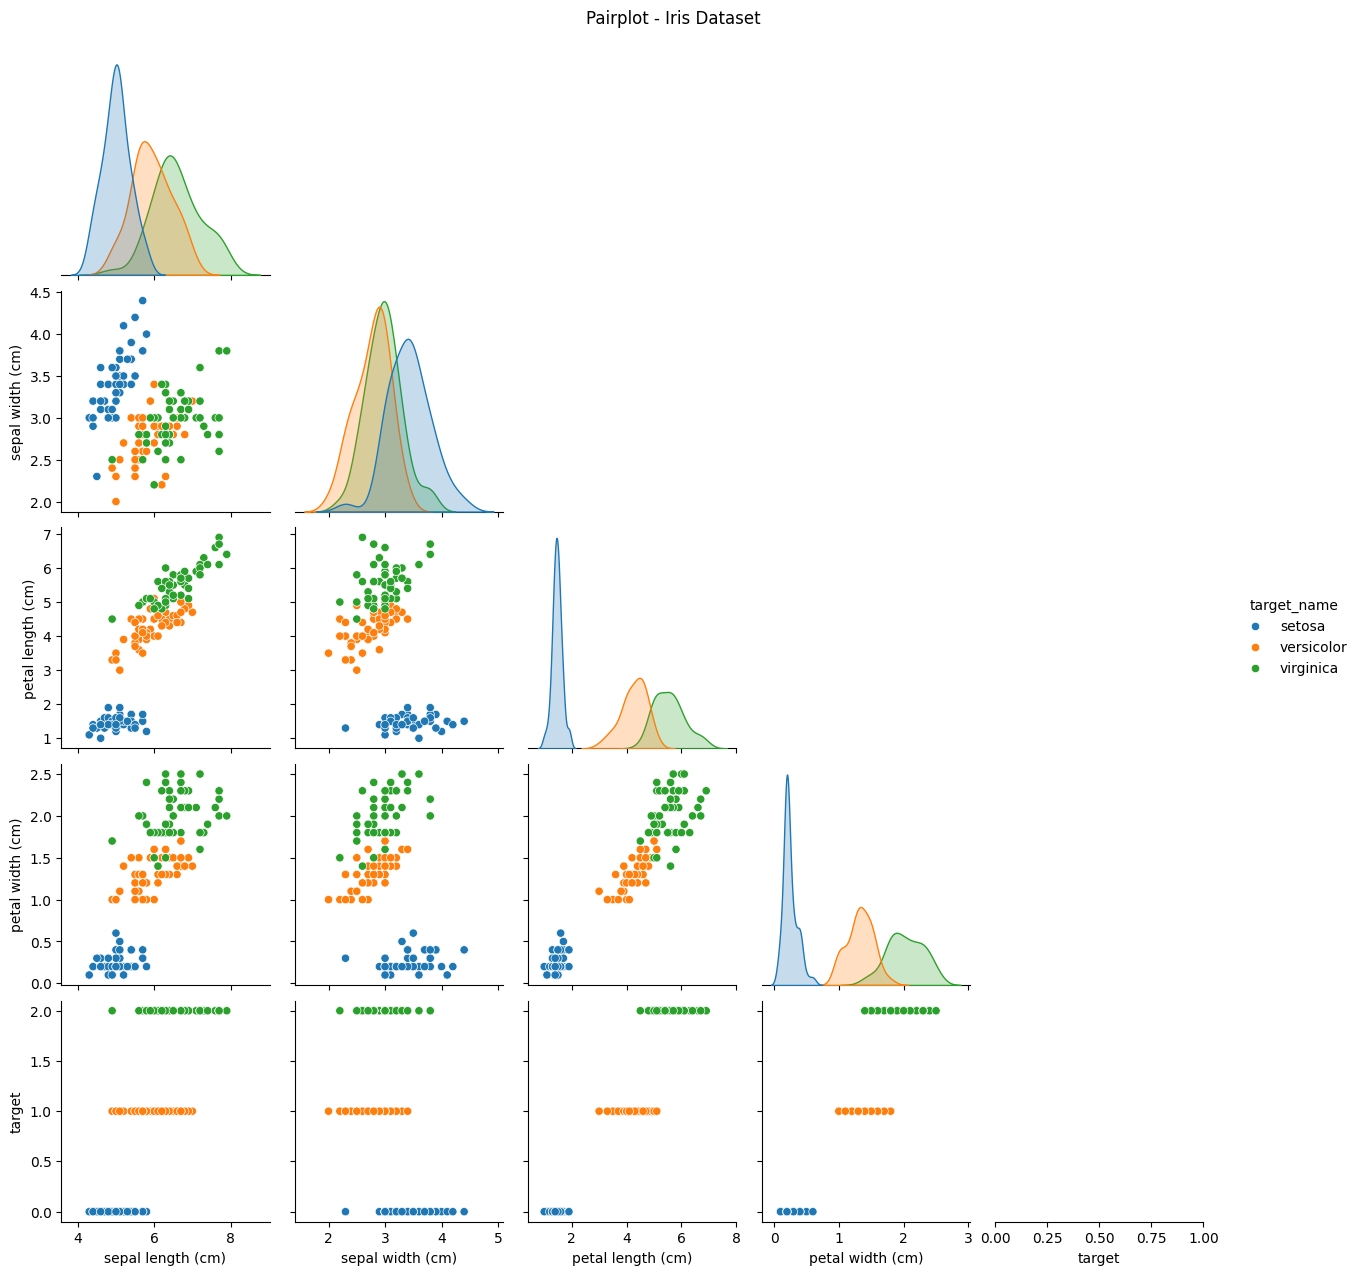

In [ ]:
sns.pairplot(df, hue='target_name', corner=True)
plt.suptitle("Pairplot - Iris Dataset", y=1.02)
plt.show()

In [ ]:
# Divide os dados em treino e teste (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# Normaliza os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Codifica as classes em one-hot encoding para treinamento com redes neurais
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [ ]:
# Define o modelo sequencial
model = Sequential([
    Dense(10, activation='relu', input_shape=(4,)),  # 4 features no Iris
    Dense(10, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compila o modelo com otimizador, função de perda e métricas
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Treina o modelo com os dados de treino
history = model.fit(X_train_scaled, y_train_cat, epochs=100, validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 558ms/step - accuracy: 0.3270 - loss: 1.0659 - val_accuracy: 0.3810 - val_loss: 1.0589
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4959 - loss: 1.0575 - val_accuracy: 0.4286 - val_loss: 1.0419
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5140 - loss: 1.0453 - val_accuracy: 0.5714 - val_loss: 1.0252
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6004 - loss: 1.0253 - val_accuracy: 0.5714 - val_loss: 1.0083
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6475 - loss: 1.0167 - val_accuracy: 0.6190 - val_loss: 0.9920
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6771 - loss: 1.0042 - val_accuracy: 0.7619 - val_loss: 0.9760
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6773 - loss: 0.9885 - val_accuracy: 0.7619 - val_loss: 0.9606
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6168 - loss: 0.9896 - val_accuracy: 0.8095 - val_loss

In [ ]:
# Avalia o modelo usando os dados de teste
loss, acc = model.evaluate(X_test_scaled, y_test_cat)
print(f"\nAcurácia no teste: {acc:.2f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step - accuracy: 0.8991 - loss: 0.2438

Acurácia no teste: 0.91


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step


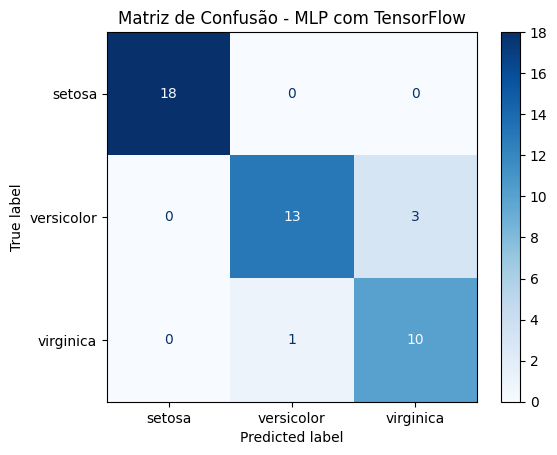

In [ ]:
# Predições e matriz de confusão
y_pred = np.argmax(model.predict(X_test_scaled), axis=1)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão - MLP com TensorFlow")
plt.show()

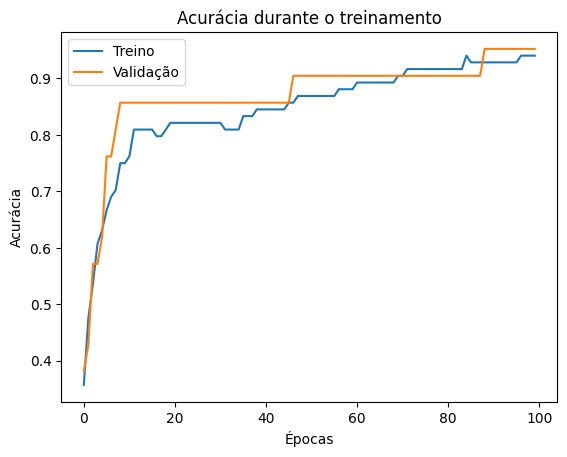

In [ ]:
# Visualização da curva de aprendizado
plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia durante o treinamento')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.show()